In [209]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.compose import ColumnTransformer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [210]:
dataset=pd.read_csv(r"C:\Users\Administrator\Desktop\Machine Learning project-MaktabKhooneh\Customer.csv")

In [211]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [212]:
dataset.info()
# there is no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [213]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [214]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [215]:
dataset.duplicated().sum()

0

In [216]:
dataset.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [217]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Visualization

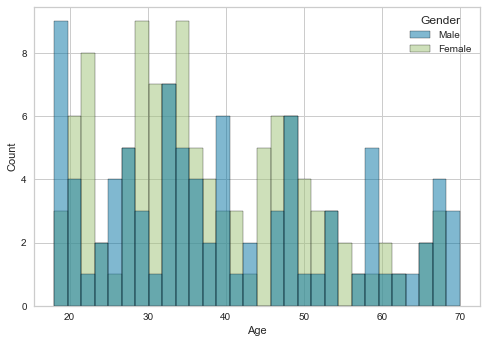

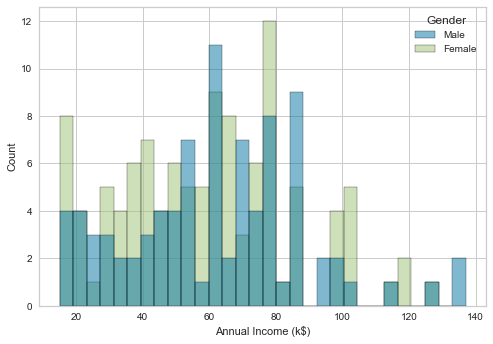

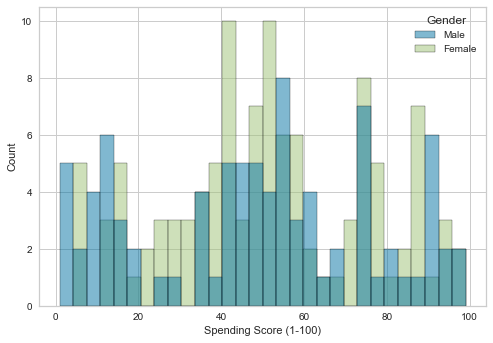

In [218]:
for col in dataset[['Age', 'Annual Income (k$)','Spending Score (1-100)']]:
    sns.histplot(x=col , data=dataset , bins=30 , hue="Gender")
    plt.show()

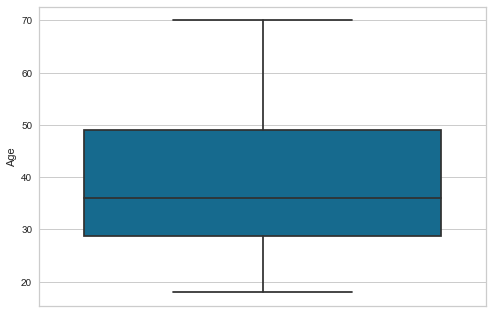

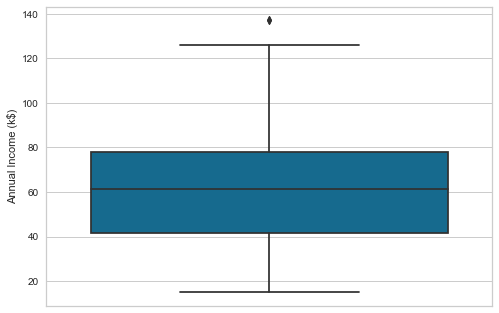

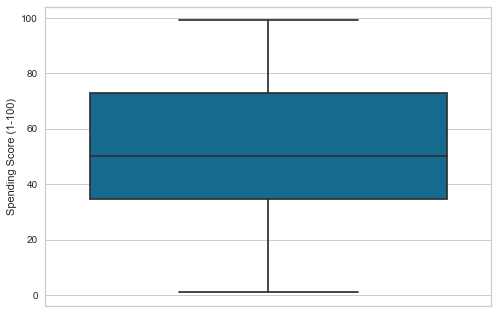

In [219]:
for col in dataset[['Age', 'Annual Income (k$)','Spending Score (1-100)']]:
    sns.boxplot(y=col , data=dataset)
    plt.show()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

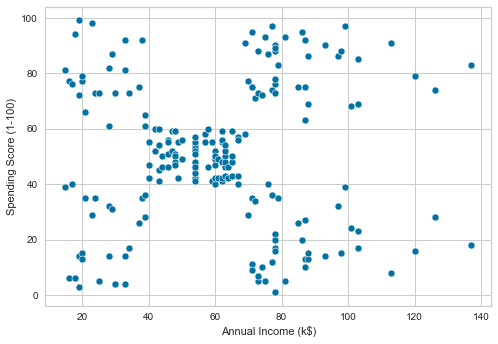

In [220]:
sns.scatterplot(x='Annual Income (k$)' , y="Spending Score (1-100)" ,data=dataset )

In [221]:
# بر اساس این ذو فیچر میتونیم بگیم مشتری ها رو میتونیم به 5 دسته تقسیم بندی کنیم 

<AxesSubplot:>

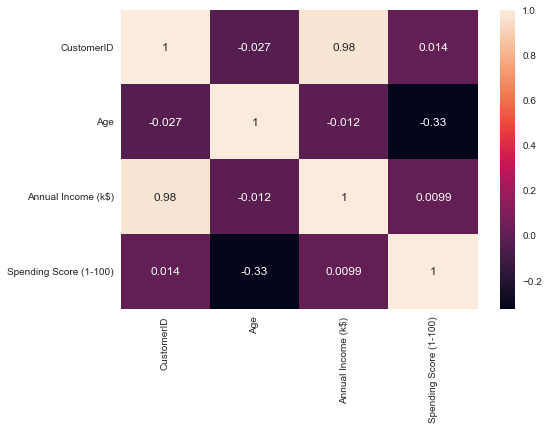

In [222]:
sns.heatmap(dataset.drop("Gender" , axis=1).corr() , annot=True)

### Preprocessing

In [223]:
def outlier (col):
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        upper_array = np.where(dataset[col]>=upper)[0]
        lower_array = np.where(dataset[col]<=lower)[0]

        dataset.drop(index=upper_array, inplace=True)
        dataset.drop(index=lower_array, inplace=True)
 

In [224]:
for col in ["Annual Income (k$)" , "Spending Score (1-100)"]:
    outlier(col)

In [281]:
kmeans_data=dataset.copy()
hierachy=dataset.copy()
dbscan_data=dataset.copy()

In [226]:
kmeans_data.shape

(198, 5)

In [227]:
kmeans_data.drop(["CustomerID" , "Gender" , "Age" ], axis=1, inplace=True)

In [228]:
kmeans_data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [229]:
num_list=list(kmeans_data[['Annual Income (k$)','Spending Score (1-100)']])
pipeline=ColumnTransformer([
    ("norm" , MinMaxScaler() , num_list),])
kmeans_data_pre=pipeline.fit_transform(kmeans_data)

# K-Means

In [230]:
# اول از همه میخوام از تکنیک البو برای انتخاب کلاستر مناسب استفاده کنم 

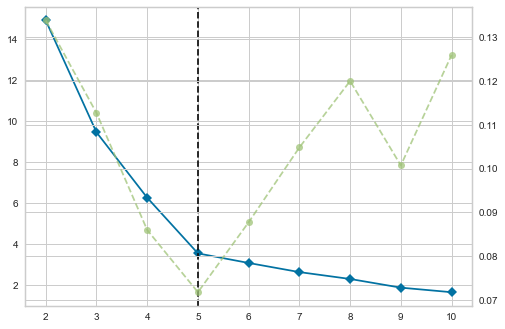

In [231]:
visualizer=KElbowVisualizer( KMeans(n_clusters=(1 , 10), init='k-means++', n_init=15, max_iter=300, copy_x=True, algorithm='elkan')).fit(kmeans_data_pre)

In [232]:
kmeans=KMeans(n_clusters=5, init='k-means++', n_init=15, max_iter=300, copy_x=True, algorithm='elkan')
kmeans.fit(kmeans_data_pre)
labels=kmeans.labels_
kmeans_data["labels"]=labels

#### Calculating the silhouette score:



In [233]:
silhouette_score(x,labels )

0.5640959164678206

In [234]:
kmeans_data.groupby("labels").mean()

,Annual Income (k$),Spending Score (1-100)
labels,,
0,55.087500,49.712500
1,25.727273,79.363636
2,86.342857,17.571429
3,85.210526,82.105263
4,26.304348,20.913043


## K-means Clusters Visualization

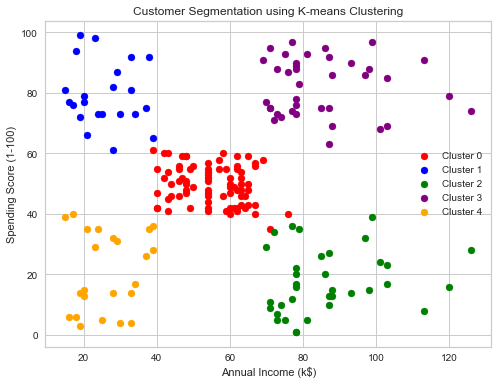

In [235]:
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(len(colors)):
    cluster_data = kmeans_data[kmeans_data['labels'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                c=colors[i], label=f'Cluster {i}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-means Clustering')
plt.legend()
plt.show()

# Hierachical 

In [257]:
hierachy.drop(["CustomerID" , "Gender" , "Age"], axis=1, inplace=True)

In [271]:
hierachy.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [272]:
num_list=list(hierachy[[ 'Annual Income (k$)','Spending Score (1-100)']])
pipeline=ColumnTransformer([
    ("norm" , MinMaxScaler() , num_list),
])
hierachy_data_pre=pipeline.fit_transform(hierachy)

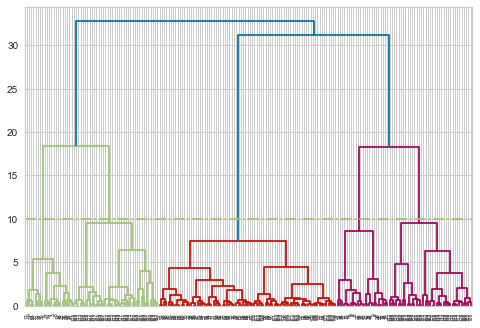

In [273]:
distance_matrix=euclidean_distances(hierachy_data_pre , hierachy_data_pre)
z=linkage(distance_matrix , method='ward')
dendro=dendrogram(z)
plt.axhline(y = 10, color = 'g', linestyle = 'dashdot')

In [267]:
agg= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(distance_matrix)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [274]:
hierachy["cluster"]=agg.labels_
hierachy.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [244]:
hierachy.groupby('cluster').mean()

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,25.727273,49.136364
1,85.210526,82.105263
2,58.617021,46.755319
3,89.000000,11.909091


## Agglomerative Clustering Visualization

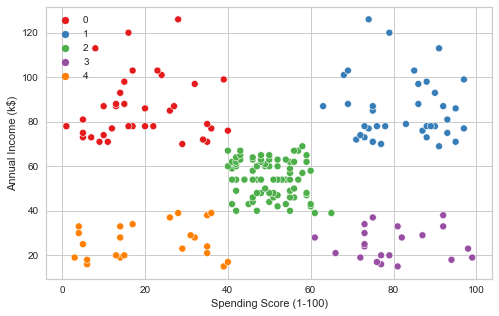

In [270]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=hierachy, x='Spending Score (1-100)', y='Annual Income (k$)', hue='cluster', palette="Set1")
plt.legend()
plt.show()

### DBSCAN

In [282]:
dbscan_data.drop(["CustomerID"  ,"Gender" , "Age"] , axis=1 , inplace=True)

In [283]:
num_list=list(dbscan_data[['Annual Income (k$)','Spending Score (1-100)']])
pipeline=ColumnTransformer([
    ("norm" , MinMaxScaler() , num_list),])
dbscan_data_pre=pipeline.fit_transform(dbscan_data)

In [367]:
db = DBSCAN(eps=0.1, min_samples=5)
db.fit(dbscan_data_pre)

DBSCAN(eps=0.1)

In [368]:
set(db.labels_)

{-1, 0, 1, 2, 3}

In [369]:
labels=db.labels_

In [370]:
dbscan_data["clusters"]=labels

In [371]:
cluster_num = set(labels)
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
dbscan_data.head()

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,0
1,15,81,0
2,16,6,1
3,16,77,0
4,17,40,0


In [372]:
dbscan_data.groupby("clusters").mean()

,Annual Income (k$),Spending Score (1-100)
clusters,,
-1,90.083333,63.583333
0,48.304348,51.730435
1,23.727273,8.909091
2,81.060606,83.000000
3,83.925926,14.444444


## DBSCAN Visualization

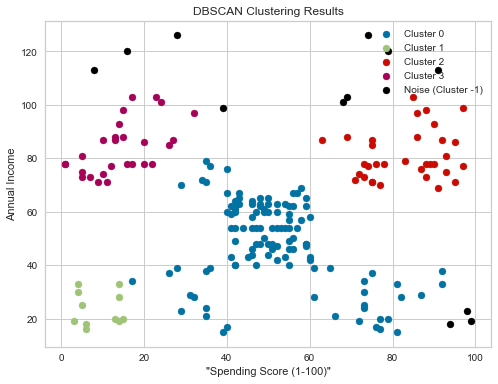

In [373]:
cluster_labels_to_show = [-1, 0, 1, 2, 3]

plt.figure(figsize=(8, 6))

for cluster_label in set(labels):
    if cluster_label == -1:
        noise_points = dbscan_data[dbscan_data["clusters"] == cluster_label]
        plt.scatter(noise_points["Spending Score (1-100)"], noise_points["Annual Income (k$)"], c='black', label=f'Noise (Cluster {cluster_label})')
    else:
        # Plot other clusters with distinct colors
        cluster_points = dbscan_data[dbscan_data["clusters"] == cluster_label]
        plt.scatter(cluster_points["Spending Score (1-100)"], cluster_points["Annual Income (k$)"], label=f'Cluster {cluster_label}')

plt.xlabel('"Spending Score (1-100)"')
plt.ylabel('Annual Income')
plt.title('DBSCAN Clustering Results')
plt.legend(loc='upper right')
plt.show()